## Covid Data Exploration

This Covid dataset original comes from https://ourworldindata.org/covid-deaths. Today I'm gone use this dataset to learn about COVID-19 trend in the United States.

### Data Preparation

In [52]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Load data
df=pd.read_csv('owid-covid-data.csv')

In [54]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [56]:
# Drop records from other country
df=df.query('location=="United States"')

In [57]:
df.location.unique()

array(['United States'], dtype=object)

In [58]:
df.shape

(754, 67)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 152774 to 153527
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    754 non-null    object 
 1   continent                                   754 non-null    object 
 2   location                                    754 non-null    object 
 3   date                                        754 non-null    object 
 4   total_cases                                 754 non-null    float64
 5   new_cases                                   753 non-null    float64
 6   new_cases_smoothed                          748 non-null    float64
 7   total_deaths                                716 non-null    float64
 8   new_deaths                                  716 non-null    float64
 9   new_deaths_smoothed                         716 non-null    float64
 10  total_

In [60]:
df.isnull().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       653
excess_mortality_cumulative                653
excess_mortality                           653
excess_mortality_cumulative_per_million    653
Length: 67, dtype: int64

In [69]:
df.duplicated().sum()

0

In [61]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.540000e+02,7.530000e+02,748.000000,716.000000,716.000000,716.000000,754.000000,753.000000,748.000000,716.000000,...,7.540000e+02,7.540000e+02,0.0,7.540000e+02,7.540000e+02,7.540000e+02,101.000000,101.000000,101.000000,101.000000
mean,2.390872e+07,1.032402e+05,103467.119171,432540.694134,1284.491620,1277.230644,71816.271444,310.109754,310.791321,1299.252337,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,438563.209901,11.972970,16.467822,1317.342602
std,2.010760e+07,1.493790e+05,136502.193715,269384.926204,980.028928,792.573643,60398.577357,448.700103,410.021072,809.170120,...,2.381898e-13,5.688115e-14,NaN,1.510906e-14,4.834898e-13,5.443704e-15,293258.791784,5.693402,11.988739,880.881686
min,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.143000,0.003000,0.000000,0.000000,0.003000,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,-13678.000000,-3.590000,-2.650000,-41.085553
25%,4.362752e+06,2.805100e+04,28764.392750,179106.500000,522.750000,718.893000,13104.699750,84.259000,86.401500,537.994500,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,170140.800000,10.330000,6.740000,511.063671
50%,2.652910e+07,5.624400e+04,63283.500000,499626.500000,1010.000000,1049.000000,79687.293000,168.944000,190.089000,1500.762500,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,495599.000000,14.320000,14.050000,1488.664944
75%,3.602924e+07,1.249600e+05,126774.035500,625017.250000,1846.500000,1791.464500,108223.521500,375.351000,380.799750,1877.407500,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,649508.800000,15.860000,23.650000,1950.974440
max,7.773988e+07,1.368563e+06,802374.000000,919696.000000,4442.000000,3403.000000,233512.647000,4110.847000,2410.146000,2762.554000,...,1.910000e+01,2.460000e+01,NaN,2.770000e+00,7.886000e+01,9.260000e-01,925081.800000,17.480000,45.920000,2778.732092


In [63]:
# Change date column from object to datetime type
df['date']= pd.to_datetime(df['date'])

In [64]:
# Check new data type
df.date.dtype

dtype('<M8[ns]')

In [65]:
df.date.sort_values()

152774   2020-01-22
152775   2020-01-23
152776   2020-01-24
152777   2020-01-25
152778   2020-01-26
            ...    
153523   2022-02-09
153524   2022-02-10
153525   2022-02-11
153526   2022-02-12
153527   2022-02-13
Name: date, Length: 754, dtype: datetime64[ns]

#### Summary of data preparation part
From the examine above, first I dropped the data of other country, then change the date column from object to datetime type. 
We could know that this dataset contains data from 2020-01-22 to 2022-02-13, 67 variables. No duplicate value. So the data is ready to explore.

#### What Features I'm interested?
I'm interested in:

- Number of total cases, total deaths, total vaccinations, people fully vaccinated, total boosters so far.
- Propotion of total_boosters/people_fully_vaccinated, total_cases/population, total_deaths/total_cases and people_fully_vaccinated/population.
- Trend of new_cases_smoothed, new_deaths_smoothed, hosp_patients, icu_patients, new_people_vaccinated_smoothed. 

### Data Exploration

Let's start with the numbers.

In [70]:
# Total cases 
df.total_cases.max()

77739880.0

In [71]:
# Total deaths
df.total_deaths.max()

919696.0

In [72]:
# Total vaccinations
df.total_vaccinations.max()

546624663.0

In [73]:
# People fully vaccinated
df.people_fully_vaccinated.max()

212953838.0

In [74]:
# Total boosters
df.total_boosters.max()

91255523.0

#### Summary of numbers
As of February 13th
- Total cases is 77739880
- Total deaths is 919696
- Total vaccinations is 546624663
- People fully vaccinated is 212953838
- Total_boosters is 91255523

Next is the propotion numbers. It will help us have a better understanding of the numbers part.

In [78]:
# Propotion of total_cases/population
float((df.total_cases.max()/df.population.unique()))*100

23.351264653158964

In [79]:
# Propotion of total_deaths/total_cases
df.total_deaths.max()/df.total_cases.max()*100

1.1830427317356291

In [80]:
# Propotion of people_fully_vaccinated/population
float(df.people_fully_vaccinated.max()/df.population.unique())*100

63.96641505034404

In [81]:
# Propotion of total_boosters/people_fully_vaccinated
df.total_boosters.max()/df.people_fully_vaccinated.max()*100

42.8522556141956

#### Summary of propotion numbers
As of February 13th
- Propotion of total_cases/population is 23.25%
- Propotion of total_deaths/total_cases is 1.18%
- Propotion of people_fully_vaccinated/population 63.97%
- Propotion of total_boosters/people_fully_vaccinated is 42.85%

Finnaly I'll explore the trends. Let's see the trend of single variable.

In [103]:
# Define a function to reduce repeat code
def x_y_t (xL,yL,title):
    plt.title(title, fontsize=15)
    plt.xlabel(xL)
    plt.ylabel(yL)
color=sns.color_palette()[0]
sns.set(style='darkgrid',)

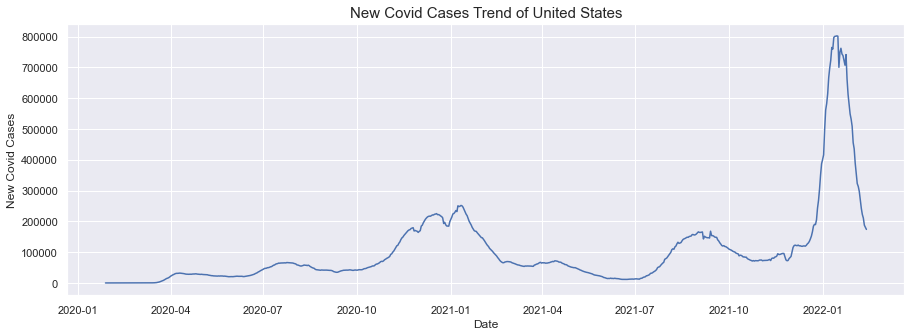

In [104]:
# New cases trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x= 'date', y='new_cases_smoothed')
title='New Covid Cases Trend of United States'
xL='Date'
yL='New Covid Cases'

x_y_t (xL,yL,title)
plt.show()

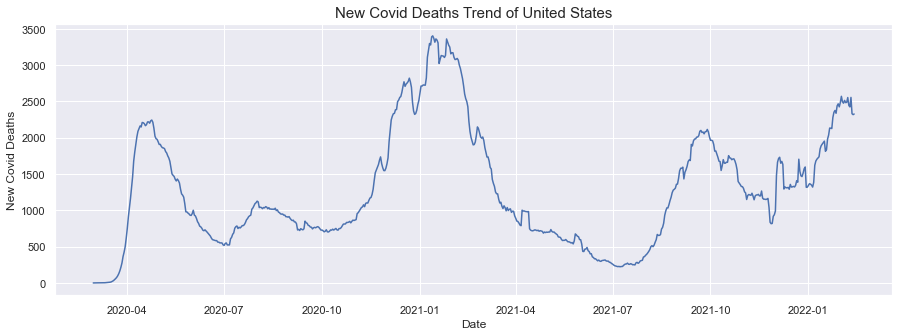

In [105]:
# New deaths trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x= 'date', y='new_deaths_smoothed')
title='New Covid Deaths Trend of United States'
xL='Date'
yL='New Covid Deaths'

x_y_t (xL,yL,title)
plt.show()

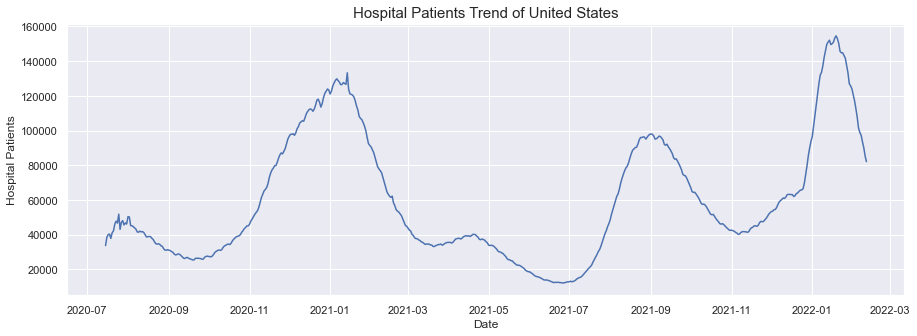

In [106]:
# Hosp_patients trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x= 'date', y='hosp_patients')
title='Hospital Patients Trend of United States'
xL='Date'
yL='Hospital Patients'

x_y_t (xL,yL,title)
plt.show()

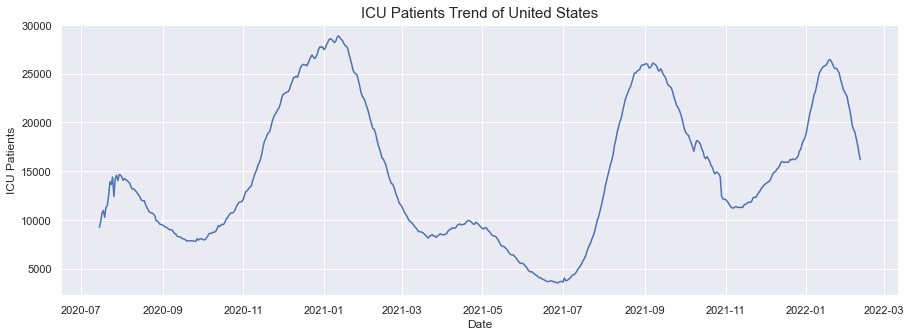

In [107]:
# Icu_patients trends
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x= 'date', y='icu_patients')
title='ICU Patients Trend of United States'
xL='Date'
yL='ICU Patients'

x_y_t (xL,yL,title)
plt.show()

In [28]:
# Let's these features together

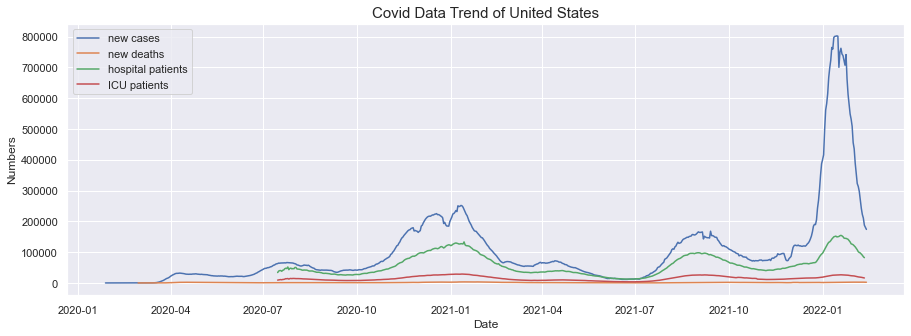

In [121]:
fig, ax = plt.subplots(figsize=(15,5))
ax= sns.lineplot(x='date', y='new_cases_smoothed', data=df,  label= 'new cases')
ax1 = sns.lineplot(x='date', y='new_deaths_smoothed', data=df, label='new deaths')
ax2=sns.lineplot(x='date', y='hosp_patients',data=df, label='hospital patients')
ax3=sns.lineplot(x='date', y='icu_patients', data=df, label='ICU patients')
title= 'Covid Data Trend of United States'
xL='Date'
yL='Numbers'
plt.legend()

x_y_t (xL,yL,title)
plt.show()